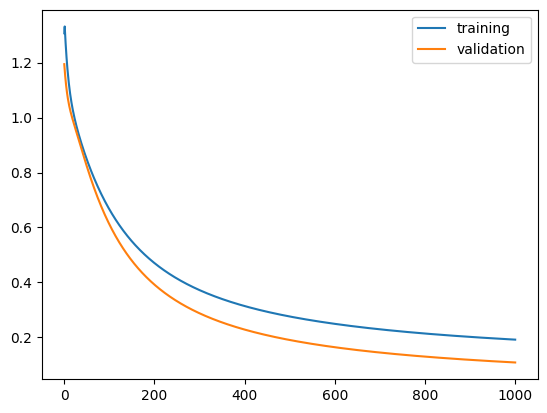

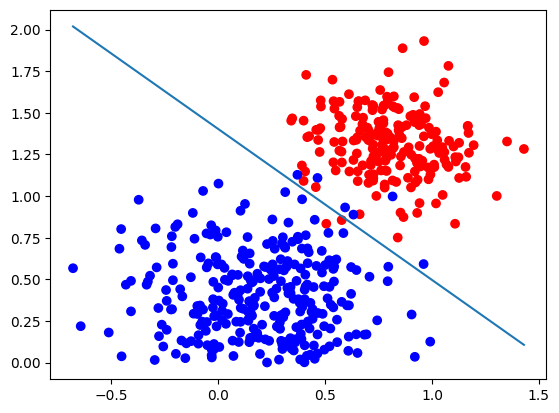

In [5]:
import numpy as np
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample
import matplotlib.pyplot as plt

class ClassificationGD:

    def h(self,x):
        return x @ self.w + self.b
    

    def svm_predict(self,x):

        eps = 0.0000000000000000001

        # return update_values(prediction)
        return np.sign(self.h(x) + eps)

    
    def svm_raw_predict(self,x):
        return self.h(x)
    
    def svm_loss(self,x,y):

        return np.dot(self.w,self.w)/2 + self.c*np.sum(np.maximum(np.zeros(len(y)), 1 - y*self.h(x)))
    
    def svm_loss_derivates(self,x,y):

        

        exists_der = (y*self.h(x) < 1).reshape(-1,1)
        dw = self.w - np.sum((x*(y.reshape(-1,1))*self.c)*exists_der,axis=0)
        db = - np.sum( self.c*y.reshape(-1,1)*exists_der,axis=0 )



        return dw,db


        

    def logistic_h(self,x):
        return (1 + np.exp(-self.h(x)))**-1
    
    def logistic_predict(self,x):

        # return update_values(prediction)
        return self.logistic_h(x) >= 0.5
    
    

    def logistic_loss(self,x,y):

        eps = 0.0000000000001

        class_0_loss = np.dot(1 - y,np.log2(1 - self.logistic_h(x) + eps))
        class_1_loss = np.dot(y,np.log2(self.logistic_h(x) + eps))
    
        return (class_0_loss + class_1_loss)/(-len(y))
    
    def logistic_loss_derivates(self,x,y):
        dw = (1/len(y))*( (y - self.logistic_h(x)) @ -x )
        db = np.sum(y - self.logistic_h(x))*(-1/len(y))

        return  dw,db

    def update_parameters(self,derivates):
        dw,db = derivates
        self.w =  self.w - self.alpha*dw
        self.b =  self.b - self.alpha*db

    def plot_losses(self):
        plt.plot([i for i in range(len(self.loss))],self.loss,label='training')
        plt.plot([i for i in range(len(self.loss_validate))],self.loss_validate,label='validation')
        plt.legend()
        plt.show()
    
    def get_train_loss(self):
        return ([i for i in range(len(self.loss))],self.loss)
    
    def get_val_loss(self):
        return ([i for i in range(len(self.loss_validate))],self.loss_validate)

    def train(self,x,y,x_val,y_val,batch_size=30):
        np.random.seed(2001)
        self.w = np.array([np.random.rand() for i in range(len(x.T))])
        self.b = np.random.random()





        L = self.Loss(x,y)
        self.loss = [L]
        self.loss_validate = []
        step = self.epochs//10 


        for _ in range(self.epochs):

            train_batch = resample(range(len(y)),n_samples=min(batch_size,len(y)),replace=False,random_state=42)
            val_batch = resample(range(len(y_val)),n_samples=min(batch_size,len(y_val)),replace=False,random_state=42)

            self.loss_validate.append(self.Loss(x_val[val_batch],y_val[val_batch]))

            der = self.Loss_derivate(x[train_batch],y[train_batch])
            self.update_parameters(der)
            L = self.Loss(x[train_batch],y[train_batch])
            self.loss.append(L)


        self.loss_validate.append(self.Loss(x_val[val_batch],y_val[val_batch]))

    
    def plot2d(self,x1,x2,y):
        if len(self.w) == 2:
            x_ = np.linspace(min(x1),max(x1),10)
            y_ = (-self.b - self.w[0]*x_)/(self.w[1])
            plt.plot(x_,y_)
            plt.scatter(x1,x2,c = ["red" if elem >= 1 else "blue" for elem in y])
            plt.show()
        else:
            print("Error: el numero de dimensiones debe ser 2")
    
    def __init__(self,alpha,epochs,c=10,model='logistic'):

        functions_dictionary = {'logistic': (self.logistic_predict,self.logistic_loss,self.logistic_loss_derivates),
                                'svm': (self.svm_predict,self.svm_loss,self.svm_loss_derivates)}

        self.predict,self.Loss,self.Loss_derivate = functions_dictionary[model]


        self.model = model
        self.w = []
        self.c = c 
        self.b = 0
        self.alpha = alpha
        self.epochs = epochs
        self.loss = []
        self.loss_validate = []
    
    def getLosses(self):
        return self.loss,self.loss_validate



def normVector(X):
    scaler = MinMaxScaler()
    new_x = np.array(X).reshape(-1, 1)

    return scaler.fit_transform(new_x).reshape(-1)

def splitData(X,Y):

    X_train, X_, Y_train, Y_ = train_test_split(X,Y,test_size = 0.3,random_state=42)
    X_val, X_test, Y_val, Y_test = train_test_split(X_,Y_,test_size = 20/30,random_state=42)

    # return X_train,X_,Y_train,Y_
    return X_train,X_val,X_test,Y_train,Y_val,Y_test



# print(ClassificationGD.svm_raw_predict())
if __name__ == '__main__':
    data = pd.read_csv('../testing.csv')



    X0 = np.array(data['C1'])
    X1 = np.array(data['C2'])

    X = np.transpose(np.array([X0,X1]))
    Y = np.array(data['CLASE'])
    model = 'logistic'
    alpha = 0.15

    if model == 'svm':
        change_labels = np.vectorize(lambda x: -1 if x == 0 else 1 )
        Y = change_labels(Y)
        alpha = 0.0001

    X_train,X_val,X_testing,Y_train,Y_val,Y_testing = splitData(X,Y)

    logistic_regresion = ClassificationGD(alpha,1000,c=10,model=model)




    # logistic_regresion.train(X,Y,[],[])
    logistic_regresion.train(X_train,Y_train,X_val,Y_val)
    logistic_regresion.plot_losses()
    logistic_regresion.plot2d(X.T[0],X.T[1],Y)
    # print(Y.shape)

In [6]:
X_train

array([[ 4.070e-01,  1.148e+00],
       [ 1.460e-01,  3.690e-01],
       [ 9.840e-01,  1.101e+00],
       [ 7.840e-01,  1.383e+00],
       [ 4.890e-01,  2.930e-01],
       [ 6.510e-01,  1.534e+00],
       [ 1.019e+00,  9.560e-01],
       [ 3.290e-01,  8.410e-01],
       [ 8.070e-01,  1.350e+00],
       [ 8.910e-01,  1.293e+00],
       [-4.500e-02,  5.960e-01],
       [ 9.230e-01,  1.082e+00],
       [ 9.460e-01,  1.178e+00],
       [ 9.200e-01,  1.148e+00],
       [-6.780e-01,  5.670e-01],
       [ 7.060e-01,  1.128e+00],
       [ 6.000e-03,  9.400e-02],
       [ 9.030e-01,  1.249e+00],
       [ 4.520e-01,  2.300e-02],
       [-1.260e-01,  1.290e-01],
       [-9.000e-03,  2.840e-01],
       [ 3.290e-01,  4.160e-01],
       [-3.410e-01,  7.070e-01],
       [ 1.124e+00,  1.233e+00],
       [ 9.820e-01,  1.172e+00],
       [ 4.520e-01,  8.580e-01],
       [ 6.780e-01,  1.471e+00],
       [ 2.890e-01,  5.610e-01],
       [ 2.620e-01,  2.810e-01],
       [ 2.210e-01,  1.400e-01],
       [ 3